<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP2/nbFacu_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de datos de Google Drive

In [ ]:
# Lectura de Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Para importar funciones customizadas

Hay que especificar la ruta de donde se encuentra el módulo (archivo `.py`) para buscar las funciones.

La lectura puede ser muy celosa: las indentaciones son de 4 espacios no tabulaciones.

https://colab.research.google.com/drive/1uvHuizCBqFgvbCwEhK7FvU8JW0AfxgJw

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/75.06 - Organización de Datos/TP2/resources')

# Carga de librerías y directorios

In [ ]:
import pandas as pd
import numpy as np

# Métrica de evaluación
from sklearn.metrics import f1_score
# fold_score = f1_score(y_test, prediction, average='micro')
# Se especifica average por tener un target multiclase

# Clasificador
from sklearn.ensemble import RandomForestClassifier

# Para dividir el set de entrenamiento
from sklearn.model_selection import train_test_split

# Para la división en k-folds
from sklearn.model_selection import KFold

# Para ver progreso inline: limpia la celda en cada iteración
from IPython.display import clear_output

# Para graficar
import matplotlib.pyplot as plt

# Librería para guardar los módulos de estudio: study
import pickle

# Función para cambiar tipos de datos
from utilidades import cambio_tipos

# Rutas de los archivos a usar

In [ ]:
# Ruta train_values.csv
dir_values = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv'
# Ruta train_labels.csv
dir_labels = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'
# Ruta test_values.csv
dir_test = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/test_values.csv'
# Ruta submission_format.csv
dir_sub_format = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/submission_format.csv'
# Ruta de Binary Encodings para train_values.csv
dir_resources = '/content/drive/My Drive/75.06 - Organización de Datos/TP2/resources'

---
#Entrenamiento
---
### Carga de train

In [ ]:
columnas = ['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']
  
# Carga de train_values.csv
train = pd.read_csv(dir_values, usecols=columnas)

### Cambio de tipos de datos

In [ ]:
train = cambio_tipos(train)

In [ ]:
# Se quita la columna 
to_remove = ['building_id']
train = train.drop(columns=to_remove)

### Carga de columnas codificadas: One Hot Encoding

In [ ]:
# 38 columnas más.
train = train.join(pd.read_csv(dir_resources+f'/OHE_train.csv', dtype='uint8'))

X = train.values

### Carga de labels

In [ ]:
# Carga de train_labels.csv
labels = pd.read_csv(dir_labels, usecols=['damage_grade'], dtype='uint8')

y = labels.damage_grade.values

# Modelo Random Forest Classifier

### División de datos para entrenamiento y objetivo

In [ ]:
# Set de entrenamiento
X = train
# Labels -- solo la columna de labels
y = labels['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape\t', X_train.shape, '\ty_train.shape\t', y_train.shape)
print('X_test.shape\t', X_test.shape, '\ty_test.shape\t', y_test.shape)

X_train.shape	 (195450, 68) 	y_train.shape	 (195450,)
X_test.shape	 (65151, 68) 	y_test.shape	 (65151,)


### Instanciación de predictor (random_state=42)

In [ ]:
# n_estimators
num_estimadores = 550
# n_jobs
workers = -1
# Instancia para predictor de Random Forest
rfc = RandomForestClassifier(n_estimators=num_estimadores, n_jobs=workers, random_state=42)

### Entrenamiento único

In [ ]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 6min 58s, sys: 6.08 s, total: 7min 4s
Wall time: 3min 36s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Ahora se usa la división que faltba del train: X_test
prediction_t = rfc.predict(X_test)
print('Predicción', np.round(f1_score(y_test, prediction_t, average='micro'),4))

Predicción 0.7135


# Feature Importance

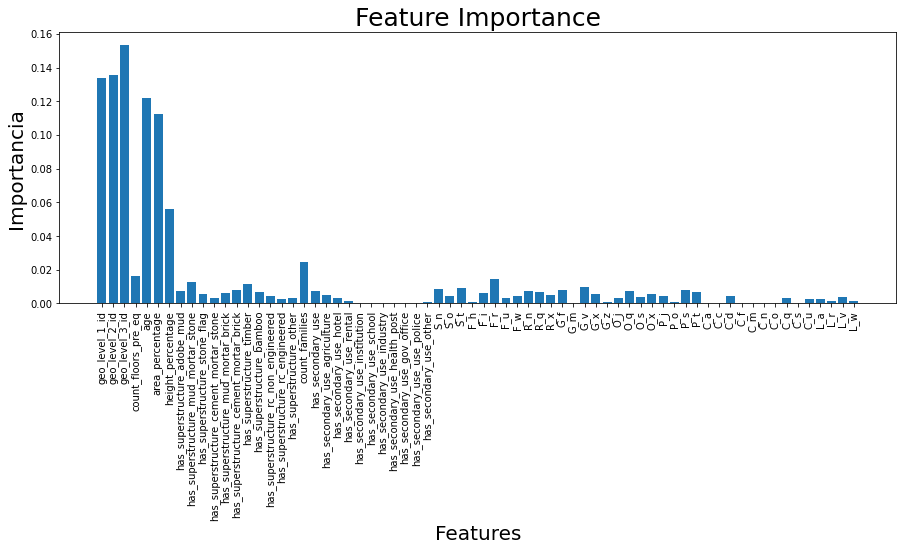

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(X_train.columns, rfc.feature_importances_)
plt.xlabel('Features', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Importancia', fontsize=20)
plt.title('Feature Importance', fontsize=25)
plt.show()

### Selección de features según importancia

De aquí se obtienen las columnas a droppear según la tolerancia asignada. Conviene ejecutar la celda ENTRENAMIENTO ÚNICO para obtener las importancias con todas las features elegidas inicialmente.


In [ ]:
%%time

labels_no_out = [] # lista de labels sin outliers.
importances_no_out = [] # lista de importancias sin outliers.
to_drop = [] # lista de columnas a droppear.

#==================#
tolerancia = 1e-3  #
#==================#
i = 1

indice_vector = np.arange(0, rfc.feature_importances_.size)
for var in indice_vector:
    clear_output(wait=True)
    if (rfc.feature_importances_[var] > tolerancia):
        labels_no_out.append(X_train.columns[var])
        importances_no_out.append(rfc.feature_importances_[var])
    else :
        to_drop.append(X_train.columns[var])
    print(i, 'de', indice_vector.size)
    i = i + 1
    
print('Cantidad de features importantes', len(importances_no_out))
print('Cantidad de features a limpiar', len(to_drop))

68 de 68
Cantidad de features importantes 53
Cantidad de features a limpiar 15
CPU times: user 2min 34s, sys: 4.23 s, total: 2min 38s
Wall time: 1min 26s


In [ ]:
to_drop

['has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'G_m',
 'G_z',
 'C_a',
 'C_c',
 'C_f',
 'C_m',
 'C_n',
 'C_o',
 'C_s']

Features filtradas por importancia. 
Se prepara el nuevo set de datos con features importantes

In [ ]:
X = train.drop(columns=to_drop)

### División de datos para entrenamiento y objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape', X_train.shape, '\ty_train.shape', y_train.shape)
print('X_test.shape', X_test.shape, '\ty_test.shape', y_test.shape)

X_train.shape (195450, 53) 	y_train.shape (195450,)
X_test.shape (65151, 53) 	y_test.shape (65151,)


# K-Fold Cross Validation

In [ ]:
# n_splits
splits = 10

# Instancia para KFold
kf = KFold(n_splits=splits)

# Listas para guardar los scores de la evaluación
scores = []

In [ ]:
%%time
i = 1

for train_index, test_index in kf.split(train) :
    clear_output(wait=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print('Entrenando fold '+str(i)+'/'+str(splits))
    rfc.fit(X_train, y_train)
    prediction_t = rfc.predict(X_test)

    scores.append(f1_score(y_test, prediction_t, average='micro'))
    i = i + 1

Entrenando fold 10/10
CPU times: user 1h 28min 52s, sys: 1min 53s, total: 1h 30min 45s
Wall time: 47min 3s


In [ ]:
print('Promedio scores:', np.mean(scores).round(4), \
      '\tcon desvío estándar de:', np.std(scores).round(4))

Promedio scores: 0.7181 	con desvío estándar de: 0.0023


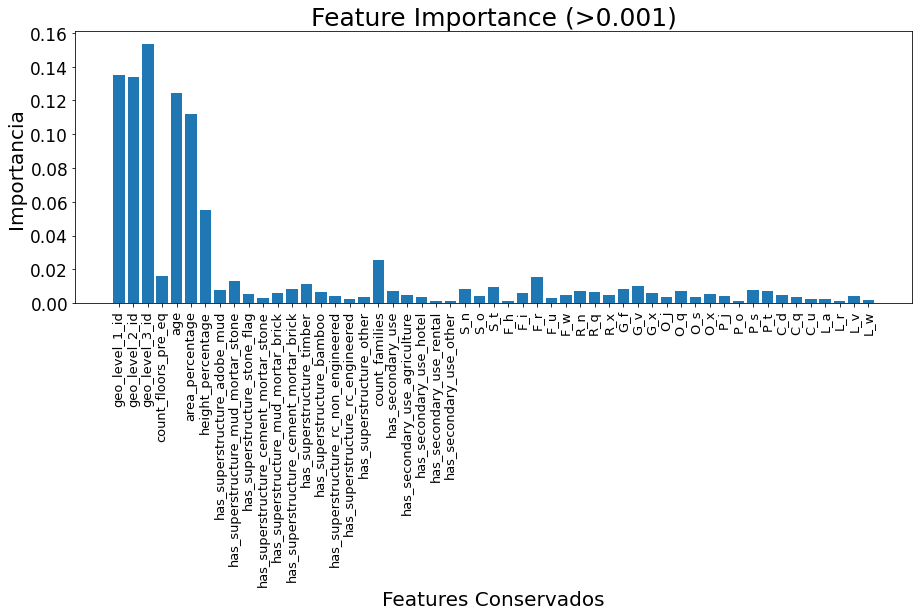

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(X_train.columns, rfc.feature_importances_)
plt.xlabel('Features Conservados', fontsize=20)
plt.xticks(rotation = 90, fontsize=13)
plt.ylabel('Importancia', fontsize=20)
plt.yticks(fontsize=17)
plt.title('Feature Importance' + ' (>' + str(tolerancia) + ')', fontsize=25)
plt.show()

## División de datos para entrenamiento y objetivo

In [ ]:
# Set de entrenamiento
X = train
# Labels -- solo la columna de labels
y = labels['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape\t', X_train.shape, '\ty_train.shape\t', y_train.shape)
print('X_test.shape\t', X_test.shape, '\ty_test.shape\t', y_test.shape)

X_train.shape	 (195450, 59) 	y_train.shape	 (195450,)
X_test.shape	 (65151, 59) 	y_test.shape	 (65151,)


## Instancias

In [ ]:
# n_estimators
num_estimadores = 40
# n_jobs
workers = -1
# Instancia para predictor de Random Forest
rfc = RandomForestClassifier(n_estimators=num_estimadores, n_jobs=workers)

# n_splits
splits = 10
# Instancia para KFold
kf = KFold(n_splits=splits)

# Listas para guardar los puntajes y errores de la evaluación
accuracy = []

In [ ]:
%%time
i = 1

for train_index, test_index in kf.split(train) :
    clear_output(wait=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print('Entrenando fold', i)
    rfc.fit(X_train, y_train)
    prediction_t = rfc.predict(X_test)

    accuracy.append(accuracy_score(y_test, prediction_t))
    i = i + 1

Entrenando fold 10
CPU times: user 8min 3s, sys: 3.73 s, total: 8min 7s
Wall time: 4min 16s


In [ ]:
precision = np.array(accuracy)

print('Promedio precision', precision.mean().round(4), \
      '\tcon desvío estándar de', precision.std().round(4))

Promedio precision 0.7149 	con desvío estándar de 0.0023
Promedio scores	 0.7149 		con desvío estándar de 0.0023


---
# Predicción del Test
---
### Carga Test set

In [ ]:
test = pd.read_csv(dir_test, usecols=columnas)

### Cambio de tipos de datos

In [ ]:
memoria = test.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 20.55 MiB


In [ ]:
# Columnas numéricas
test['building_id'] = test['building_id'].astype('int32')
test['geo_level_1_id'] = test['geo_level_1_id'].astype('int8')
test['geo_level_2_id'] = test['geo_level_2_id'].astype('int16')
test['geo_level_3_id'] = test['geo_level_3_id'].astype('int16')
test['count_floors_pre_eq'] = test['count_floors_pre_eq'].astype('int8')
test['age'] = test['age'].astype('int16')
test['area_percentage'] = test['area_percentage'].astype('int8')
test['height_percentage'] = test['height_percentage'].astype('int8')
test['count_families'] = test['count_families'].astype('int8')

# Columnas Booleanas
test['has_superstructure_adobe_mud'] = test['has_superstructure_adobe_mud'].astype('bool')
test['has_superstructure_mud_mortar_stone'] = test['has_superstructure_mud_mortar_stone'].astype('bool')
test['has_superstructure_stone_flag'] = test['has_superstructure_stone_flag'].astype('bool')
test['has_superstructure_cement_mortar_stone'] = test['has_superstructure_cement_mortar_stone'].astype('bool')
test['has_superstructure_mud_mortar_brick'] = test['has_superstructure_mud_mortar_brick'].astype('bool')
test['has_superstructure_cement_mortar_brick'] = test['has_superstructure_cement_mortar_brick'].astype('bool')
test['has_superstructure_timber'] = test['has_superstructure_timber'].astype('bool')
test['has_superstructure_bamboo'] = test['has_superstructure_bamboo'].astype('bool')
test['has_superstructure_rc_non_engineered'] = test['has_superstructure_rc_non_engineered'].astype('bool')
test['has_superstructure_rc_engineered'] = test['has_superstructure_rc_engineered'].astype('bool')
test['has_superstructure_other'] = test['has_superstructure_other'].astype('bool')
test['has_secondary_use'] = test['has_secondary_use'].astype('bool')
test['has_secondary_use_agriculture'] = test['has_secondary_use_agriculture'].astype('bool')
test['has_secondary_use_hotel'] = test['has_secondary_use_hotel'].astype('bool')
test['has_secondary_use_rental'] = test['has_secondary_use_rental'].astype('bool')
test['has_secondary_use_institution'] = test['has_secondary_use_institution'].astype('bool')
test['has_secondary_use_school'] = test['has_secondary_use_school'].astype('bool')
test['has_secondary_use_industry'] = test['has_secondary_use_industry'].astype('bool')
test['has_secondary_use_health_post'] = test['has_secondary_use_health_post'].astype('bool')
test['has_secondary_use_gov_office'] = test['has_secondary_use_gov_office'].astype('bool')
test['has_secondary_use_use_police'] = test['has_secondary_use_use_police'].astype('bool')
test['has_secondary_use_other'] = test['has_secondary_use_other'].astype('bool')

In [ ]:
memoria = test.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.07 MiB


### Carga de columnas codificadas: Binary Encoding

In [ ]:
# 4 columnas
foundation_type = pd.read_csv(dir_Binary_test+f'/BE_foundation_type.csv', dtype='uint8')
test = test.join(foundation_type)

In [ ]:
# 4 columnas
ground_floor_type = pd.read_csv(dir_Binary_test+f'/BE_ground_floor_type.csv', dtype=('uint8'))
test = test.join(ground_floor_type)

In [ ]:
# 3 columnas
land_surface_condition = pd.read_csv(dir_Binary_test+f'/BE_land_surface_condition.csv', dtype='uint8')
test = test.join(land_surface_condition)

In [ ]:
# 3 columnas
legal_ownership_status = pd.read_csv(dir_Binary_test+f'/BE_legal_ownership_status.csv', dtype='uint8')
test = test.join(legal_ownership_status)

In [ ]:
# 3 columnas
other_floor_type = pd.read_csv(dir_Binary_test+f'/BE_other_floor_type.csv', dtype='uint8')
test = test.join(other_floor_type)

In [ ]:
# 5 columnas
plan_configuration = pd.read_csv(dir_Binary_test+f'/BE_plan_configuration.csv', dtype='uint8')
test = test.join(plan_configuration)

In [ ]:
# 3 columnas
position = pd.read_csv(dir_Binary_test+f'/BE_position.csv', dtype='uint8')
test = test.join(position)

In [ ]:
# 3 columnas
roof_type = pd.read_csv(dir_Binary_test+f'/BE_roof_type.csv', dtype='uint8')
test = test.join(roof_type)

In [ ]:
memoria = test.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 5.38 MiB


# Preparando la predicción

In [ ]:
# n_estimators
num_estimadores = 200
# n_jobs
workers = -1
# Instancia para predictor de Random Forest
rfc = RandomForestClassifier(n_estimators=num_estimadores, n_jobs=workers, random_state=42)

In [ ]:
%%time
rfc.fit(X, y)

CPU times: user 4min 23s, sys: 4.57 s, total: 4min 27s
Wall time: 2min 17s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Predicción

In [ ]:
prediction = rfc.predict(test)

In [ ]:
prediction

array([3, 2, 2, ..., 2, 2, 2], dtype=int8)

### Submission

In [ ]:
sub_example = pd.read_csv(dir_sub_format)

In [ ]:
sub_example

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1
...,...,...
86863,310028,1
86864,663567,1
86865,1049160,1
86866,442785,1


In [ ]:
submit = pd.DataFrame()
submit['building_id'] = test['building_id']
submit['damage_grade'] = prediction

In [ ]:
submit

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [ ]:
submit.to_csv('submission.csv', index=False)

In [ ]:
aux = pd.read_csv('submission.csv')

In [ ]:
aux

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2
